In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline#for encoding
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn import preprocessing

UsageError: unrecognized arguments: encoding


In [6]:
#Importing data set
datafc = pd.read_csv("Fraud_Check.csv",encoding='latin1')
datafc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [7]:
datafc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
datafc.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
datafc.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [10]:
rename = {'Marital.Status' : 'marital_status',
         'Taxable.Income' : 'taxable_income',
         'City.Population' : 'city_population',
         'Work.Experience' : 'work_experience'}

In [18]:
datafc.rename(columns=rename, inplace= True )

In [19]:
datafc

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


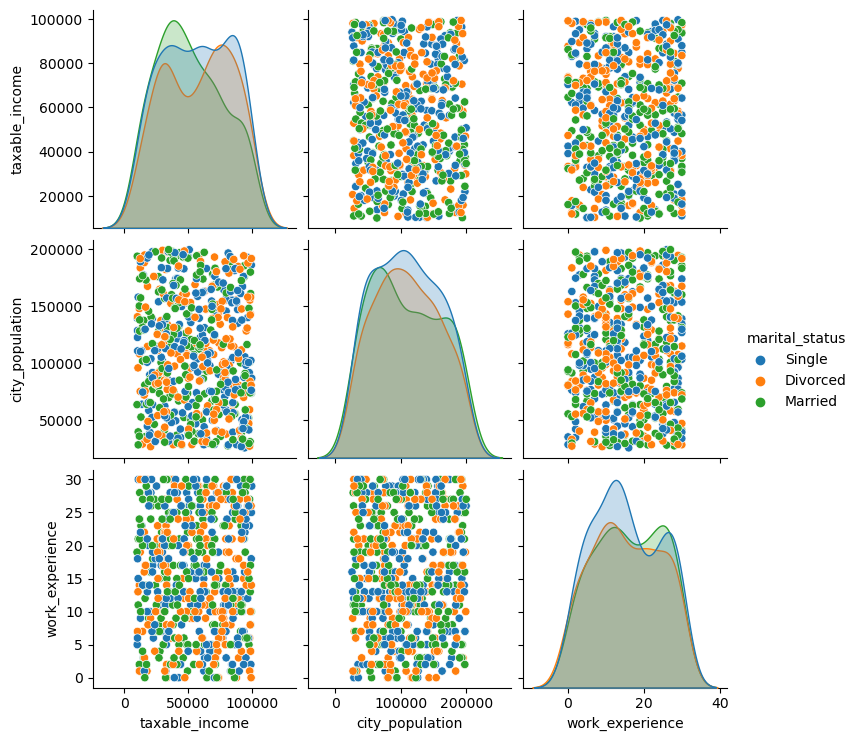

In [22]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=datafc, hue = 'marital_status')

# Data Preprocessing

In [21]:
#Converting target variable in categorical variable
datafc["tax_status"] = np.where(datafc['taxable_income']<=30000,'Risky','Good')

In [23]:
datafc

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban,tax_status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [24]:
datafc.tax_status.unique()

array(['Good', 'Risky'], dtype=object)

In [25]:
new=datafc

In [26]:
new

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban,tax_status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [27]:
new.drop(['taxable_income'], axis=1, inplace= True)
new

,Undergrad,marital_status,city_population,work_experience,Urban,tax_status
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder =LabelEncoder()
new['Undergrad']= label_encoder.fit_transform(new['Undergrad']) 
new['marital_status']= label_encoder.fit_transform(new['marital_status']) 
new['Urban']= label_encoder.fit_transform(new['Urban'])

In [33]:
new

,Undergrad,marital_status,city_population,work_experience,Urban,tax_status
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


# Model Building

In [34]:
X=new.iloc[:,:5]
X

,Undergrad,marital_status,city_population,work_experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [35]:
new.tax_status.value_counts()

Good     476
Risky    124
Name: tax_status, dtype: int64

In [36]:
Y=new.iloc[:,5]
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: tax_status, Length: 600, dtype: object

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# Splitting data into training and testing data set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=40,test_size=0.2)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(480, 5)
(120, 5)
(480,)
(120,)


# Building Decision Tree Classifier using Entropy Criteria

In [44]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [45]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

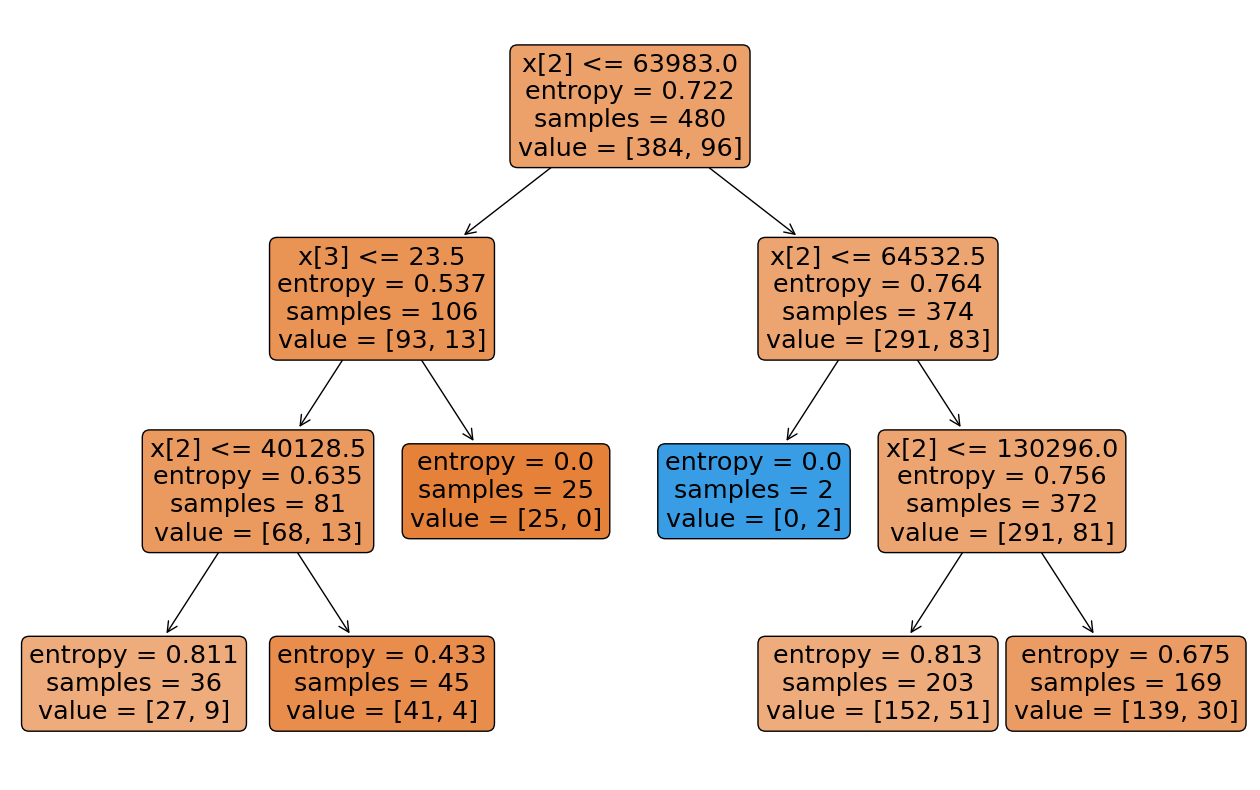

In [46]:
# Prepare a plot figure with set size.
plt.figure(figsize = (16,10))
# Plot the decision tree.
plot_tree(model,rounded = True,filled = True)
# Display the tree plot figure.
plt.show()


In [47]:
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Good    120
dtype: int64

In [48]:
pd.crosstab(Y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,Good
tax_status,
Good,92
Risky,28


In [49]:
# Accuracy 
np.mean(preds==Y_test)

0.7666666666666667

In [51]:
from sklearn.metrics import classification_report

print(classification_report(preds,Y_test))

              precision    recall  f1-score   support

        Good       1.00      0.77      0.87       120
       Risky       0.00      0.00      0.00         0

    accuracy                           0.77       120
   macro avg       0.50      0.38      0.43       120
weighted avg       1.00      0.77      0.87       120



C:\Users\vemula sandhya\.conda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vemula sandhya\.conda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vemula sandhya\.conda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
